In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as soup
import requests
from urllib.request import urlopen

In [6]:
#reading url
http_obj = urlopen('https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo,b5g')
webdata = http_obj.read()
print(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [7]:
#parsing via beautifulsoup
data = soup(webdata, 'html.parser')
data

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [8]:
pages_link=data.find_all('a',class_='ge-49M')
domain='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
for i in range(2,24):
    link=domain+str(i)
    page_data=urlopen(link)
    webdata1=page_data.read()
    webdata += webdata1

In [9]:
alldata = soup(webdata, 'html.parser')
alldata

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [10]:
containers = alldata.find_all('div', class_='_2kHMtA')
len(containers)

526

In [26]:
f=open('laptops_all.csv','wb')
f.write('product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image\n'.encode())

for container in containers:
    product = container.find('div', class_='_4rR01T')
    product_name=product.text.split('-')[0].strip()
    
    star = container.find('div', class_='_3LWZlK')
    try:
        stars=star.text
    except:
        stars=0
    
    ratings = container.find('span',class_='_2_R_DZ')
    try:
        rating=ratings.text.split()[0].replace(',','')
    except:
        rating=0
    
    review = container.find('span',class_='_2_R_DZ')
    try:
        reviews=review.text.split()[3].replace(',','')
    except:
        reviews=0
    
    curr_price = container.find('div', class_='_30jeq3 _1_WHN1').text.replace(',','').replace('₹','')
    
    MRP = container.find('div', class_='_3I9_wc _27UcVY')
    try:
        mrp=MRP.text.replace(',','').replace('₹','')
    except:
        mrp=0
    
    info=container.find_all('li',class_='rgWa7D')
    processor=info[0].text
    ram=info[1].text
    
    image_url=container.find('img',class_='_396cs4')
    image=image_url['src']
    
    print(product_name,stars,rating,reviews,curr_price,mrp,processor,ram,image)
    f.write(f'{product_name},{stars},{rating},{reviews},{curr_price},{mrp},{processor},{ram},{image}\n'.encode())
    print('\n')
f.close()

HP Celeron Dual Core 4 1885 260 18990 33390 Intel Celeron Dual Core Processor 4 GB LPDDR4X RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/x/w/r/-original-imagrs2bqaczkcty.jpeg?q=70


HP 15s (2023) Ryzen 3 Dual Core 3250U 4.2 2093 204 35490 39995 AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70


ASUS Vivobook 15 Core i3 11th Gen 4.3 4381 396 37990 56990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/q/e/z/-original-imagpxgqesgrthks.jpeg?q=70


ASUS Vivobook 15 Core i5 11th Gen 4.3 2507 188 47990 70990 Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/312/xif0q/computer/n/h/v/-original-imagq9hcmgg3etg8.jpeg?q=70


Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 4.2 6849 630 38190 63190 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM https://rukminim2.flixcart.com/image/312/

In [27]:
df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)
df

C:\Users\gargs\AppData\Local\Temp\ipykernel_69748\376650449.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r'laptops_all.csv',error_bad_lines=False, index_col=None)
Skipping line 10: expected 9 fields, saw 13
Skipping line 49: expected 9 fields, saw 13
Skipping line 72: expected 9 fields, saw 13
Skipping line 93: expected 9 fields, saw 13
Skipping line 113: expected 9 fields, saw 13
Skipping line 142: expected 9 fields, saw 13
Skipping line 169: expected 9 fields, saw 13
Skipping line 192: expected 9 fields, saw 13
Skipping line 239: expected 9 fields, saw 13
Skipping line 263: expected 9 fields, saw 13
Skipping line 288: expected 9 fields, saw 13
Skipping line 313: expected 9 fields, saw 13
Skipping line 359: expected 9 fields, saw 13
Skipping line 365: expected 9 fields, saw 11
Skipping line 377: expected 9 fields, saw 10
Skipping line 382: expected 9 fields, saw 13
Skip

product_name  stars  rating  reviews  \
0                            HP Celeron Dual Core    4.0    1885      260   
1           HP 15s (2023) Ryzen 3 Dual Core 3250U    4.2    2093      204   
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3               ASUS Vivobook 15 Core i5 11th Gen    4.3    2507      188   
4    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.2    6849      630   
..                                            ...    ...     ...      ...   
501                RedmiBook Pro Core i5 11th Gen    4.1    6255      693   
502                HP 14s Intel Celeron Dual Core    3.8     533       44   
503             ASUS VivoBook 15 Core i3 10th Gen    4.0    1918      227   
504                DELL Inspiron Core i3 11th Gen    4.0     313       42   
505           DELL Insprion 3511 Core i3 11th Gen    3.6      26        4   

     curr_price    mrp                           processor               ram  \
0         18990  33390   Intel Celeron Dual Core Processor  4 GB LPDDR4X RAM   
1         35490  39995     AMD Ryzen 3 Dual Core Processor     8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)     8 GB DDR4 RAM   
4         38190  63190  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
..          ...    ...                                 ...               ...   
501       37990  59999  Intel Core i5 Processor (11th Gen)     8 GB DDR4 RAM   
502       29776  36490   Intel Celeron Dual Core Processor     8 GB DDR4 RAM   
503       35990  45990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
504       44800  50693  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
505       43990  55490  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/x...  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
501  https://rukminim2.flixcart.com/image/312/312/k...  
502  https://rukminim2.flixcart.com/image/312/312/x...  
503  https://rukminim2.flixcart.com/image/312/312/x...  
504  https://rukminim2.flixcart.com/image/312/312/k...  
505  https://rukminim2.flixcart.com/image/312/312/k...  

[506 rows x 9 columns]

In [28]:
df.shape

(506, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  506 non-null    object 
 1   stars         506 non-null    float64
 2   rating        506 non-null    int64  
 3   reviews       506 non-null    int64  
 4   curr_price    506 non-null    int64  
 5   mrp           506 non-null    int64  
 6   processor     506 non-null    object 
 7   ram           506 non-null    object 
 8   image         506 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 35.7+ KB


## Product having highest rating

In [30]:
df[df['rating']==max(df['rating'])]

product_name  stars  rating  reviews  curr_price    mrp  \
469  ASUS Celeron Dual Core    3.7   18006     2328       22990  30990   

                             processor            ram  \
469  Intel Celeron Dual Core Processor  4 GB DDR4 RAM   

                                                 image  
469  https://rukminim2.flixcart.com/image/312/312/k...

## Top 5 laptops based on ratings

In [41]:
top_5_rated=df.sort_values(by='rating',ascending=False).head()
top_5_rated

product_name  stars  rating  reviews  \
469                        ASUS Celeron Dual Core    3.7   18006     2328   
182      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12145     1187   
186      ASUS VivoBook 15 (2022) Core i3 10th Gen    4.3   12145     1167   
245  realme Book(Slim) Intel Evo Core i5 11th Gen    4.4    7778     1024   
4    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.2    6849      630   

     curr_price    mrp                                        processor  \
469       22990  30990                Intel Celeron Dual Core Processor   
182       33990  50990               Intel Core i3 Processor (10th Gen)   
186       35500  50990               Intel Core i3 Processor (10th Gen)   
245       47999  69999  Powered by 11th Gen Intel Evo Core i5 Processor   
4         38190  63190               Intel Core i3 Processor (11th Gen)   

                                               ram  \
469                                  4 GB DDR4 RAM   
182                                  8 GB DDR4 RAM   
186                                  8 GB DDR4 RAM   
245  Microsoft Office 2019 Home & Student Included   
4                                    8 GB DDR4 RAM   

                                                 image  
469  https://rukminim2.flixcart.com/image/312/312/k...  
182  https://rukminim2.flixcart.com/image/312/312/x...  
186  https://rukminim2.flixcart.com/image/312/312/x...  
245  https://rukminim2.flixcart.com/image/312/312/k...  
4    https://rukminim2.flixcart.com/image/312/312/x...

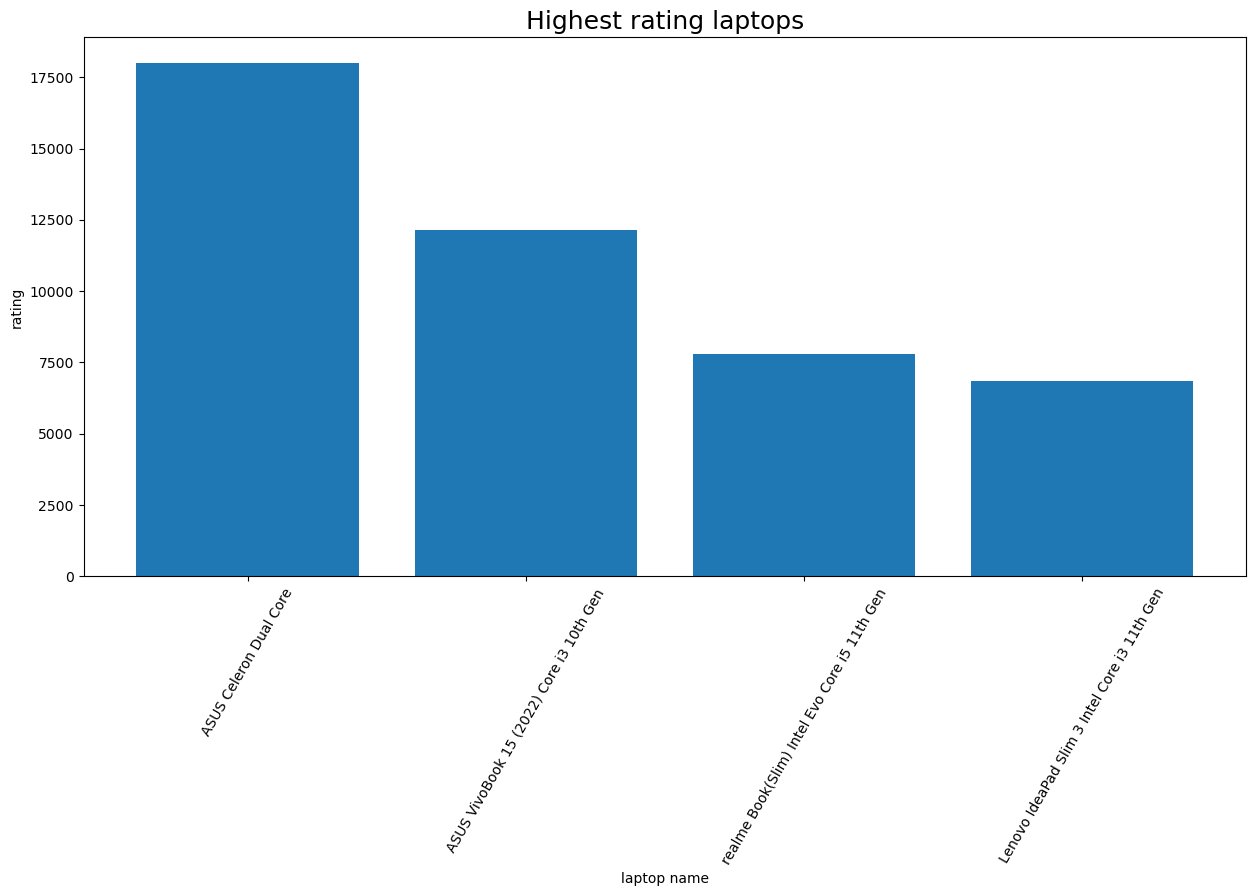

In [40]:
plt.figure(figsize=(15,7))
plt.bar(x=top_5_rated['product_name'],height=top_5_rated['rating'])
plt.title('Highest rating laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('rating')
plt.xticks(rotation=60)
plt.show()

## Most affordable laptops

In [49]:
top10_affordable=df.sort_values(by='curr_price',ascending=True).head(10)
top10_affordable

product_name  stars  rating  reviews  \
213           ASUS Chromebook Celeron Dual Core    3.6     419       53   
334  Primebook 4G Android Based MediaTek MT8788    4.1    1507      467   
329           ASUS Chromebook Celeron Dual Core    3.6     419       53   
451              Ultimus Lite Celeron Dual Core    4.3       7        0   
314  Primebook 4G Android Based MediaTek MT8788    4.1    1507      477   
309           ASUS Chromebook Celeron Dual Core    3.6     419       53   
290  Primebook 4G Android Based MediaTek MT8788    4.1    1507      477   
289           ASUS Chromebook Celeron Dual Core    3.6     419       53   
55            ASUS Chromebook Celeron Dual Core    3.6     419       53   
58   Primebook 4G Android Based MediaTek MT8788    4.1    1507      477   

     curr_price    mrp                           processor              ram  \
213       13990  24990   Intel Celeron Dual Core Processor  4 GB LPDDR4 RAM   
334       13990  24990  MediaTek MediaTek MT8788 Processor  4 GB LPDDR4 RAM   
329       13990  24990   Intel Celeron Dual Core Processor  4 GB LPDDR4 RAM   
451       13990  20990   Intel Celeron Dual Core Processor    4 GB DDR4 RAM   
314       13990  24990  MediaTek MediaTek MT8788 Processor  4 GB LPDDR4 RAM   
309       13990  24990   Intel Celeron Dual Core Processor  4 GB LPDDR4 RAM   
290       13990  24990  MediaTek MediaTek MT8788 Processor  4 GB LPDDR4 RAM   
289       13990  24990   Intel Celeron Dual Core Processor  4 GB LPDDR4 RAM   
55        13990  24990   Intel Celeron Dual Core Processor  4 GB LPDDR4 RAM   
58        13990  24990  MediaTek MediaTek MT8788 Processor  4 GB LPDDR4 RAM   

                                                 image  
213  https://rukminim2.flixcart.com/image/312/312/k...  
334  https://rukminim2.flixcart.com/image/312/312/x...  
329  https://rukminim2.flixcart.com/image/312/312/k...  
451  https://rukminim2.flixcart.com/image/312/312/x...  
314  https://rukminim2.flixcart.com/image/312/312/x...  
309  https://rukminim2.flixcart.com/image/312/312/k...  
290  https://rukminim2.flixcart.com/image/312/312/x...  
289  https://rukminim2.flixcart.com/image/312/312/k...  
55   https://rukminim2.flixcart.com/image/312/312/k...  
58   https://rukminim2.flixcart.com/image/312/312/x...

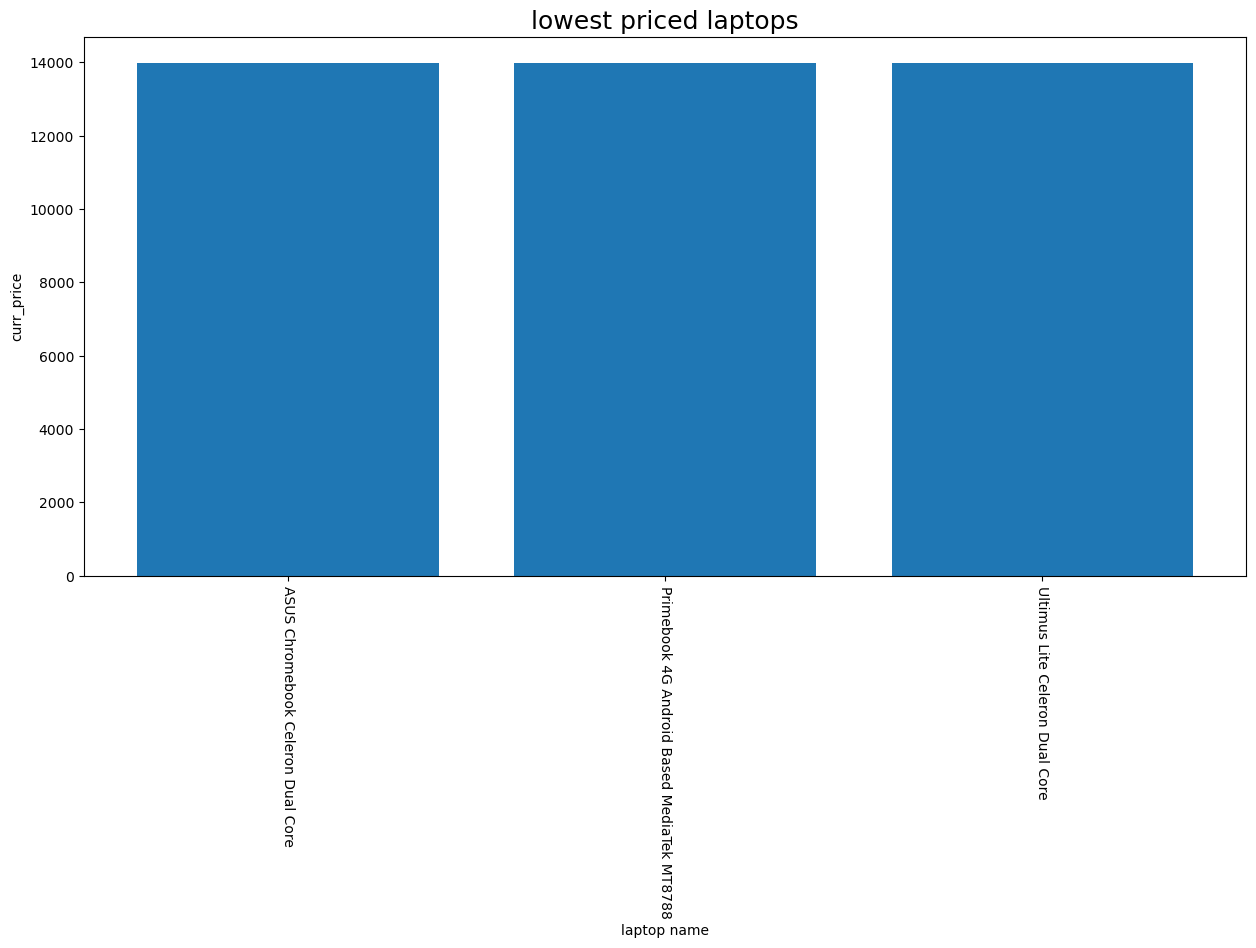

In [50]:
plt.figure(figsize=(15,7))
plt.bar(x=top10_affordable['product_name'],height=top10_affordable['curr_price'])
plt.title('lowest priced laptops',fontsize=18)
plt.xlabel('laptop name')
plt.ylabel('curr_price')
plt.xticks(rotation=270)
plt.show()

## Calculating discount

In [52]:
smalldf=df[['product_name','curr_price','mrp']]
smalldf

product_name  curr_price    mrp
0                            HP Celeron Dual Core       18990  33390
1           HP 15s (2023) Ryzen 3 Dual Core 3250U       35490  39995
2               ASUS Vivobook 15 Core i3 11th Gen       37990  56990
3               ASUS Vivobook 15 Core i5 11th Gen       47990  70990
4    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen       38190  63190
..                                            ...         ...    ...
501                RedmiBook Pro Core i5 11th Gen       37990  59999
502                HP 14s Intel Celeron Dual Core       29776  36490
503             ASUS VivoBook 15 Core i3 10th Gen       35990  45990
504                DELL Inspiron Core i3 11th Gen       44800  50693
505           DELL Insprion 3511 Core i3 11th Gen       43990  55490

[506 rows x 3 columns]

In [53]:
smalldf['discount']=smalldf['mrp']-smalldf['curr_price']

C:\Users\gargs\AppData\Local\Temp\ipykernel_69748\1426680961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldf['discount']=smalldf['mrp']-smalldf['curr_price']


### Highest discounted laptop

In [54]:
smalldf.sort_values(by='discount',ascending=False)

product_name  curr_price    mrp  discount
117                   DELL Core i3 11th Gen       38490  99999     61509
159       ASUS Vivobook 15 Core i5 12th Gen       48990  90990     42000
226          DELL Inspiron Core i5 11th Gen       49890  90783     40893
437                   DELL Core i3 11th Gen       39990  78632     38642
413  Lenovo IdeaPad Ryzen 5 Hexa Core 5500U       49490  86290     36800
..                                      ...         ...    ...       ...
435          HP 15s Ryzen 3 Dual Core 3200U       38000  38500       500
488                     HP Core i3 10th Gen       39500  40000       500
454            DELL Vostro Core i3 10th Gen       38250  38538       288
332          DELL Inspiron Core i3 11th Gen       45990  46156       166
479       ASUS Chromebook Celeron Dual Core       24990      0    -24990

[506 rows x 4 columns]

In [56]:
df.columns

Index(['product_name', 'stars', 'rating', 'reviews', 'curr_price', 'mrp',
       'processor', 'ram', 'image'],
      dtype='object')

In [63]:
df

product_name  stars  rating  reviews  \
0                            HP Celeron Dual Core    4.0    1885      260   
1           HP 15s (2023) Ryzen 3 Dual Core 3250U    4.2    2093      204   
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
3               ASUS Vivobook 15 Core i5 11th Gen    4.3    2507      188   
4    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.2    6849      630   
..                                            ...    ...     ...      ...   
501                RedmiBook Pro Core i5 11th Gen    4.1    6255      693   
502                HP 14s Intel Celeron Dual Core    3.8     533       44   
503             ASUS VivoBook 15 Core i3 10th Gen    4.0    1918      227   
504                DELL Inspiron Core i3 11th Gen    4.0     313       42   
505           DELL Insprion 3511 Core i3 11th Gen    3.6      26        4   

     curr_price    mrp                           processor               ram  \
0         18990  33390   Intel Celeron Dual Core Processor  4 GB LPDDR4X RAM   
1         35490  39995     AMD Ryzen 3 Dual Core Processor     8 GB DDR4 RAM   
2         37990  56990  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
3         47990  70990  Intel Core i5 Processor (11th Gen)     8 GB DDR4 RAM   
4         38190  63190  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
..          ...    ...                                 ...               ...   
501       37990  59999  Intel Core i5 Processor (11th Gen)     8 GB DDR4 RAM   
502       29776  36490   Intel Celeron Dual Core Processor     8 GB DDR4 RAM   
503       35990  45990  Intel Core i3 Processor (10th Gen)     8 GB DDR4 RAM   
504       44800  50693  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   
505       43990  55490  Intel Core i3 Processor (11th Gen)     8 GB DDR4 RAM   

                                                 image  
0    https://rukminim2.flixcart.com/image/312/312/x...  
1    https://rukminim2.flixcart.com/image/312/312/x...  
2    https://rukminim2.flixcart.com/image/312/312/x...  
3    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
..                                                 ...  
501  https://rukminim2.flixcart.com/image/312/312/k...  
502  https://rukminim2.flixcart.com/image/312/312/x...  
503  https://rukminim2.flixcart.com/image/312/312/x...  
504  https://rukminim2.flixcart.com/image/312/312/k...  
505  https://rukminim2.flixcart.com/image/312/312/k...  

[506 rows x 9 columns]

In [64]:
RAM=input('RAM?: ')
PROCESSOR=input('Processor?: ')
df[df.ram==RAM]
df[df.processor==PROCESSOR]

RAM?: 8 GB DDR4 RAM
Processor?: Intel Core i3 Processor (11th Gen)


product_name  stars  rating  reviews  \
2               ASUS Vivobook 15 Core i3 11th Gen    4.3    4381      396   
4    Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen    4.2    6849      630   
24                  HP 14s Intel Core i3 11th Gen    4.3    5360      463   
32                  HP 15s Intel Core i3 11th Gen    4.2    1186      101   
37              Lenovo IdeaPad 3 Core i3 11th Gen    4.2     174       14   
..                                            ...    ...     ...      ...   
475                       Lenovo Core i3 11th Gen    0.0       0        0   
484                DELL Inspiron Core i3 11th Gen    4.2      16        0   
485                DELL Inspiron Core i3 11th Gen    3.6     719       91   
504                DELL Inspiron Core i3 11th Gen    4.0     313       42   
505           DELL Insprion 3511 Core i3 11th Gen    3.6      26        4   

     curr_price    mrp                           processor            ram  \
2         37990  56990  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
4         38190  63190  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
24        37000  49557  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
32        40490  49425  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
37        34990  49190  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
..          ...    ...                                 ...            ...   
475       37950  48999  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
484       48190  56000  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
485       42500  48000  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
504       44800  50693  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
505       43990  55490  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   

                                                 image  
2    https://rukminim2.flixcart.com/image/312/312/x...  
4    https://rukminim2.flixcart.com/image/312/312/x...  
24   https://rukminim2.flixcart.com/image/312/312/x...  
32   https://rukminim2.flixcart.com/image/312/312/x...  
37   https://rukminim2.flixcart.com/image/312/312/k...  
..                                                 ...  
475  https://rukminim2.flixcart.com/image/312/312/x...  
484  https://rukminim2.flixcart.com/image/312/312/k...  
485  https://rukminim2.flixcart.com/image/312/312/l...  
504  https://rukminim2.flixcart.com/image/312/312/k...  
505  https://rukminim2.flixcart.com/image/312/312/k...  

[92 rows x 9 columns]

### Extracting links of other pages

- base='https://www.flipkart.com'
- pages_link=data.find_all('a',class_='ge-49M')
- base+pages_link[0]['href']

- pages_link=data.find_all('a',class_='ge-49M')
- domain='https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo%2Cb5g&page='
- for i in range(2,24):
    print(domain+str(i))